In [1]:
import cv2
import numpy as np
from importnb import Notebook
import matplotlib.pyplot as plt
import numpy.fft as fft
import numpy.matlib

In [2]:
with Notebook(): 
        import utils
        import pinkNoise

In [21]:
def rotateMatrix(matrix, angle):
    mat_center = tuple(np.array(matrix.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(mat_center, angle, 1.0)
    return cv2.warpAffine(matrix, rot_mat, matrix.shape[1::-1], flags=cv2.INTER_LINEAR)

In [22]:
def blurKernel(r, theta):
    kernel = np.zeros((r,r))
    kernel[r//2,:] = 1/r
    return rotateMatrix(kernel, theta)

In [23]:
def MSELoss(img1, img2):
    return np.sqrt(np.sum(np.power(img1 - img2, 2)))

In [24]:
def linearBlur(img, r, theta):
    kernel = blurKernel(r, theta)
    return cv2.filter2D(np.uint8(img), -1, kernel)

In [25]:
def findKernel(img, r_max=30, inc_ang=5):
    mse = float('inf')
    opt_r, opt_theta = 1, 0
    for r in range(1, r_max):
        for theta in range(0, 360, inc_ang):
            blur = linearBlur(img, r, theta)
            err = MSELoss(img, blur)
#             print(r, theta, err, end = '\r')
            if err < mse:
                mse = err
                opt_r, opt_theta = r, theta
    return opt_r, opt_theta

In [26]:
def patches(img):
    rows = img.shape[0]
    cols = img.shape[1]
    patch_size = 30
    
    for i in range(0, rows, patch_size):
        ex = min(i + patch_size, rows)
        for j in range(img.shape[1]):
            ey = min(j + patch_size, cols)
            print(i,j)
            print(findKernel(img[i:ex, j:ey]))
            

image ./resources/test4.jpg loaded


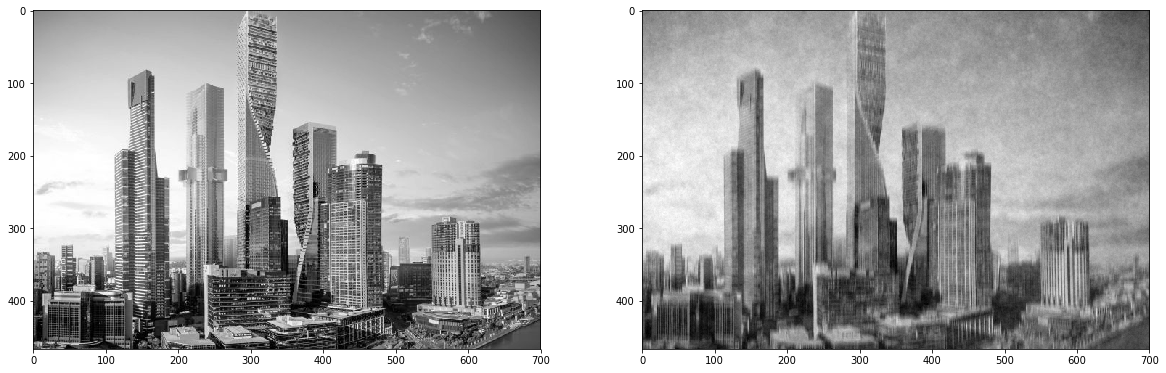

(1, 0)


In [30]:
img = utils.loadImage('./resources/test4.jpg', 'gray')
blurred_img = linearBlur(img, 10, 90)
blurred_img_noise = pinkNoise.addNoise(blurred_img, -1)
_, plots = plt.subplots(1,2,figsize=(20,20))
plots[0].imshow(img, cmap = 'gray')
plots[1].imshow(blurred_img_noise, cmap = 'gray')
plt.show()
print(findKernel(blurred_img_noise[40:80,40:80], 15, 10))